## Bike Sharing Assignment 
### Problem statement
##### Consider a Bike Sharing Company has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

##### Essentially, the company wants —
##### 1. Which variables are significant in predicting the demand for shared bikes.
##### 2. How well those variables describe the bike demands


#### Import the necessary libraries

In [40]:
# Supress Warnings and import numpy and Pandas
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Step1: Reading the data 

In [41]:
bike_sharing_df = pd.read_csv("day.csv")

In [3]:
# Observing the values of the csv
bike_sharing_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [42]:
bike_sharing_df.shape

(730, 16)

##### There are 16 columns and 730 rows for the given dataset

In [43]:
# Let's get the details of all the variables of the dataset
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [44]:
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [45]:
#To check for any null value if present
100*bike_sharing_df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### So we can conclude there are no null values present in the dataset.

### Step2: Data Cleaning and Data Visualisation

##### Before going ahead with the plot let's understand the numerical variables and also the variables 
##### which are potential categorical varibles

#### After carefully going through the data dictionary came to conclusion below that below variables are important for us and variables can be devided into numerical and categorical category as below and target variable for us is cnt


In [46]:
categorical_columns=['dteday','season','yr','mnth','holiday','weekday','workingday','weathersit']
numerical_columns=['temp','atemp','hum','windspeed','casual','registered']

#### As per data dictionary below are the values
##### - season : season (1:spring, 2:summer, 3:fall, 4:winter)
##### - yr : year (0: 2018, 1:2019)
##### - mnth : month ( 1 to 12)
##### - holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
##### - weekday : day of the week
##### - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
##### + weathersit : 
##### - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
##### - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
##### - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
##### - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Converting the categorical column values mnth, weekday, weathersit, season into appropriate values

In [47]:
bike_sharing_df.season = bike_sharing_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike_sharing_df.mnth = bike_sharing_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',
                                             6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
bike_sharing_df.weekday = bike_sharing_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
bike_sharing_df.weathersit = bike_sharing_df.weathersit.map({1:'clear',2:'mistCloudy',3:'lightSnow',4:'heavyRain'})

In [48]:
bike_sharing_df.tail(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
720,721,22-12-2019,spring,1,dec,0,sat,0,clear,10.899153,11.80565,44.1250,27.292182,205,1544,1749
721,722,23-12-2019,spring,1,dec,0,sun,0,clear,10.079153,12.97355,51.5417,8.916561,408,1379,1787
722,723,24-12-2019,spring,1,dec,0,mon,1,mistCloudy,9.483464,12.94500,79.1304,5.174437,174,746,920
723,724,25-12-2019,spring,1,dec,1,tue,0,mistCloudy,11.943464,14.72325,73.4783,11.304642,440,573,1013
724,725,26-12-2019,spring,1,dec,0,wed,1,lightSnow,9.976653,11.01665,82.3333,21.208582,9,432,441
725,726,27-12-2019,spring,1,dec,0,thu,1,mistCloudy,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,spring,1,dec,0,fri,1,mistCloudy,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,spring,1,dec,0,sat,0,mistCloudy,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,spring,1,dec,0,sun,0,clear,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,spring,1,dec,0,mon,1,mistCloudy,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [49]:
bike_sharing_df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [50]:
bike_sharing_df['weathersit'].value_counts()

weathersit
clear         463
mistCloudy    246
lightSnow      21
Name: count, dtype: int64

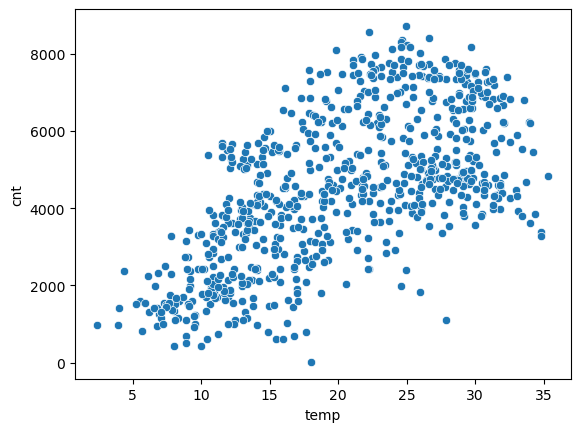

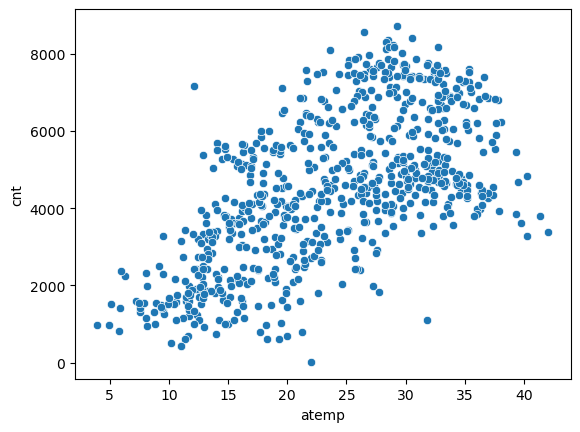

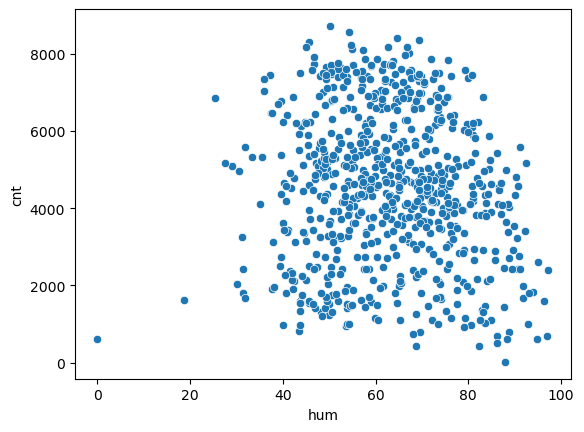

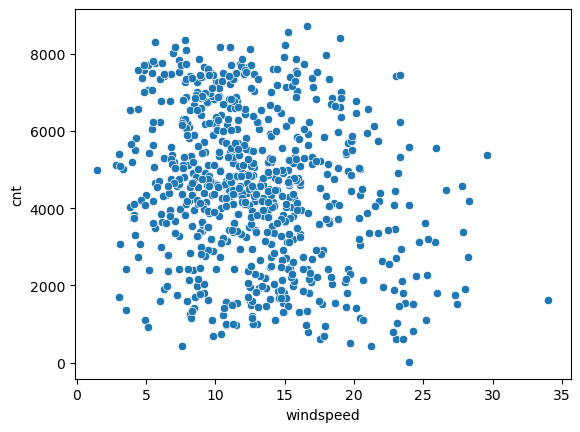

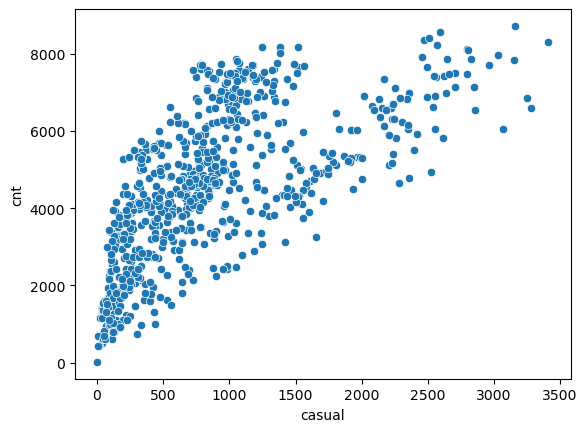

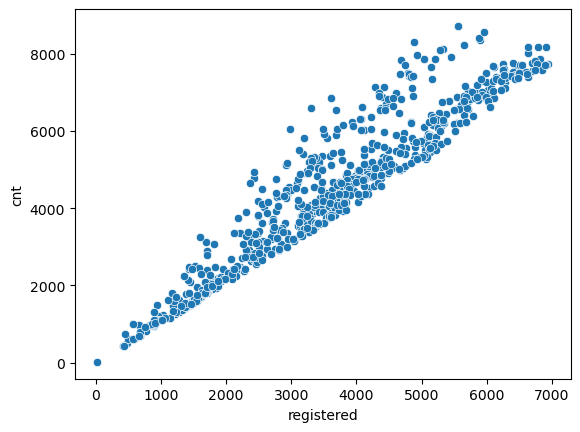

In [51]:
for col in numerical_columns:
    #fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.scatterplot(x=col, y='cnt', data=bike_sharing_df)
    #plt.tight_layout()
    plt.show()

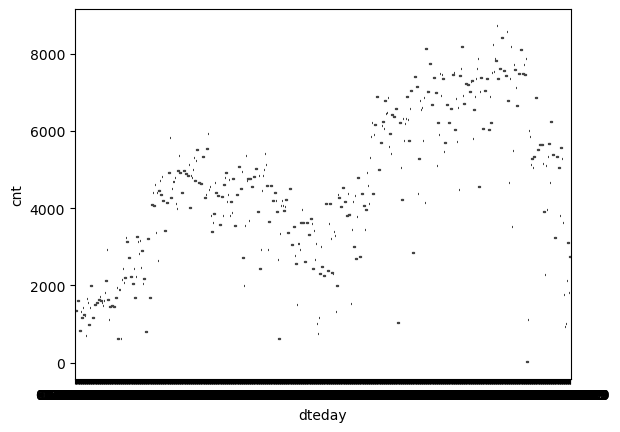

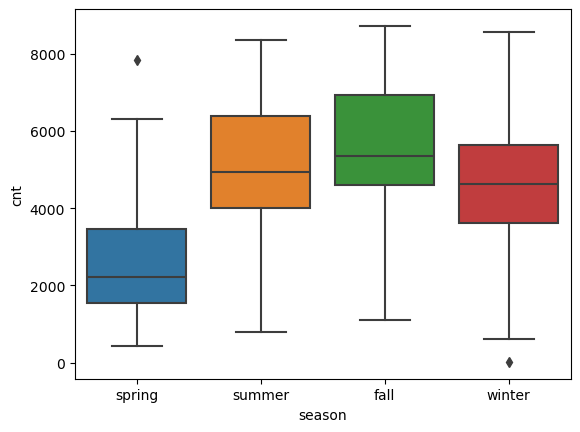

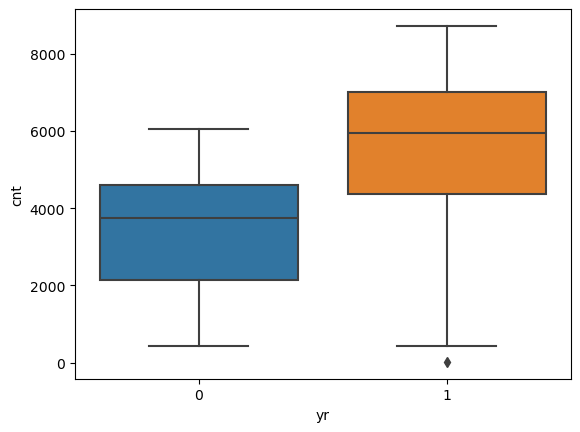

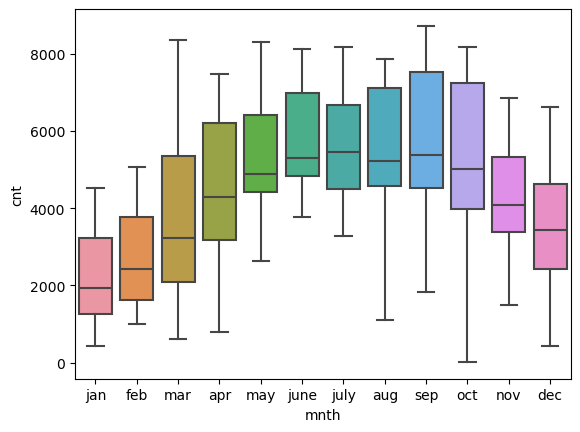

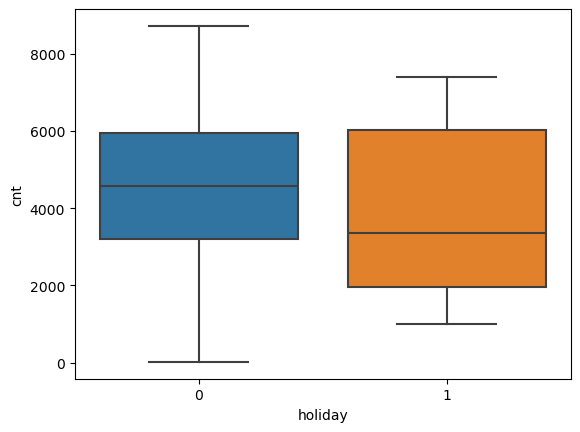

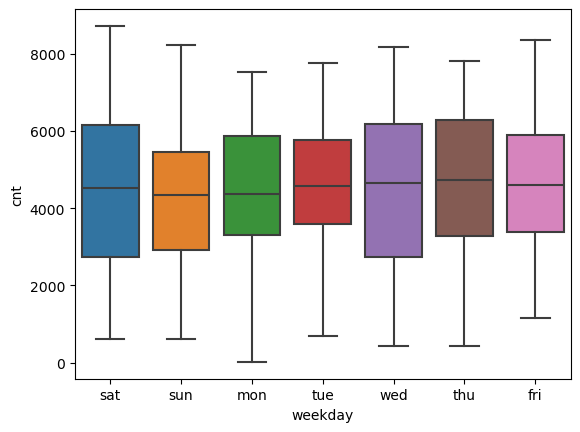

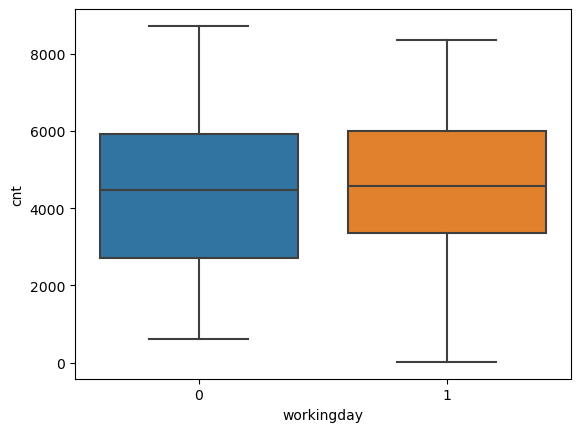

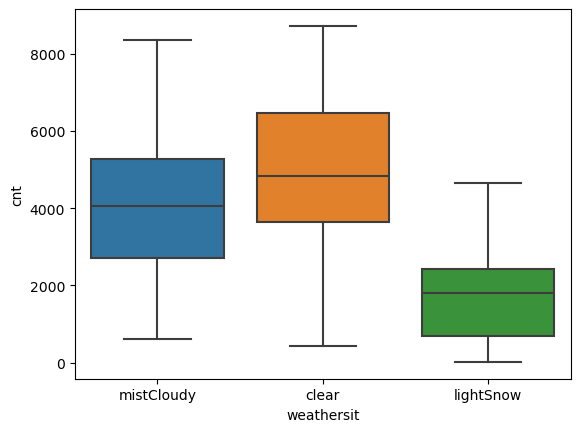

In [52]:
for col in categorical_columns:
    sns.boxplot(x=col, y='cnt', data=bike_sharing_df)
    plt.show()

<Figure size 1500x3000 with 0 Axes>

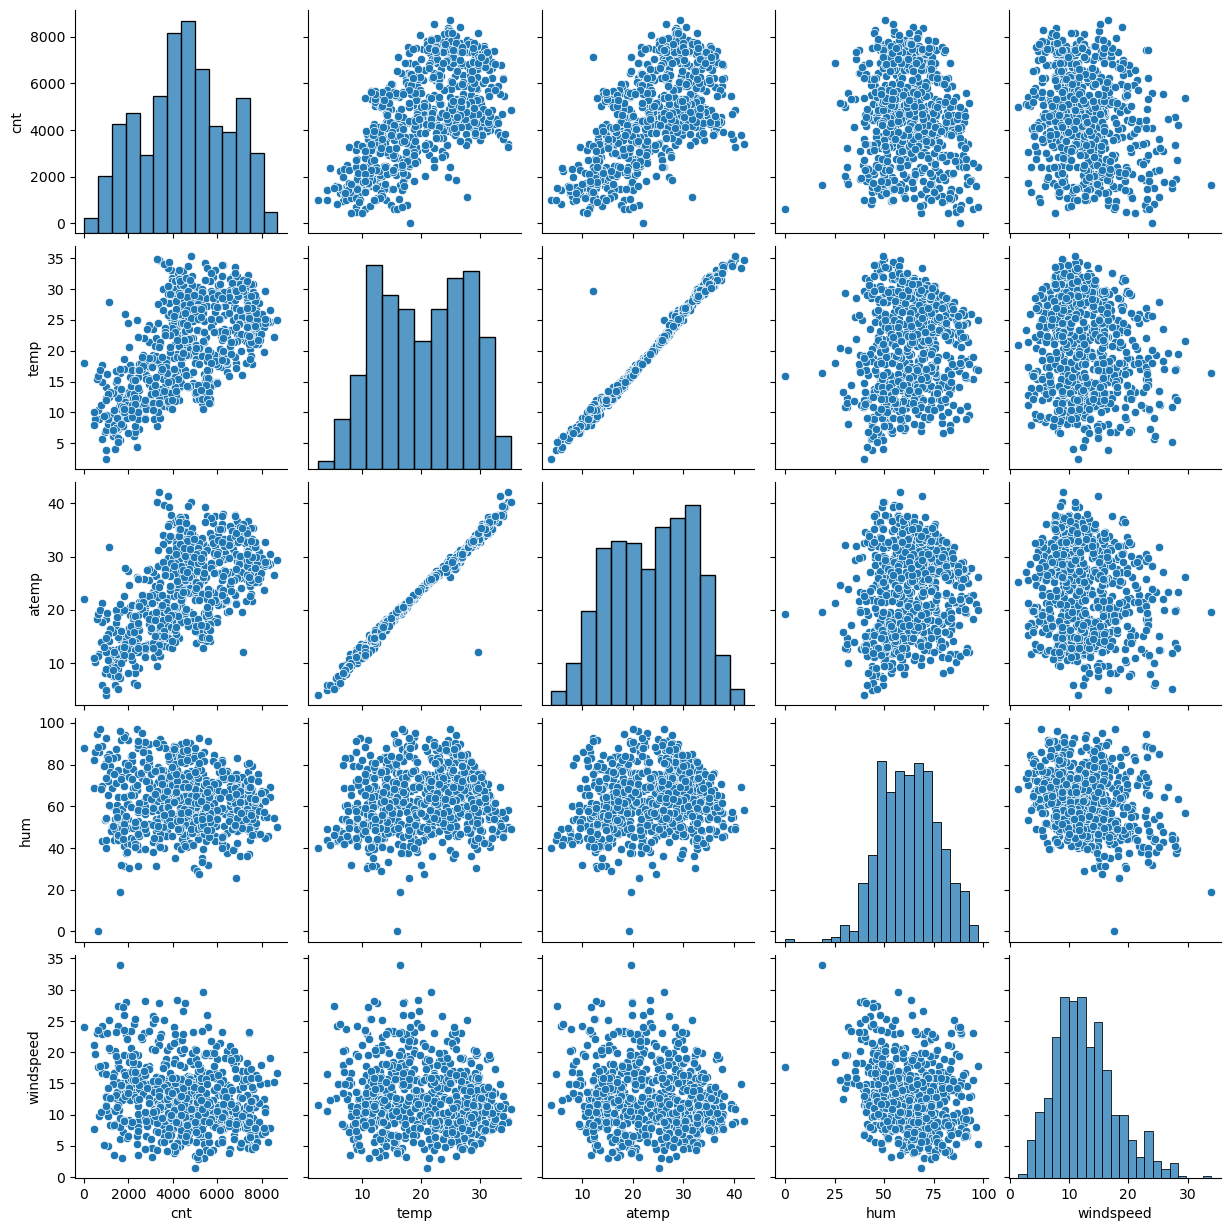

In [53]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_sharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

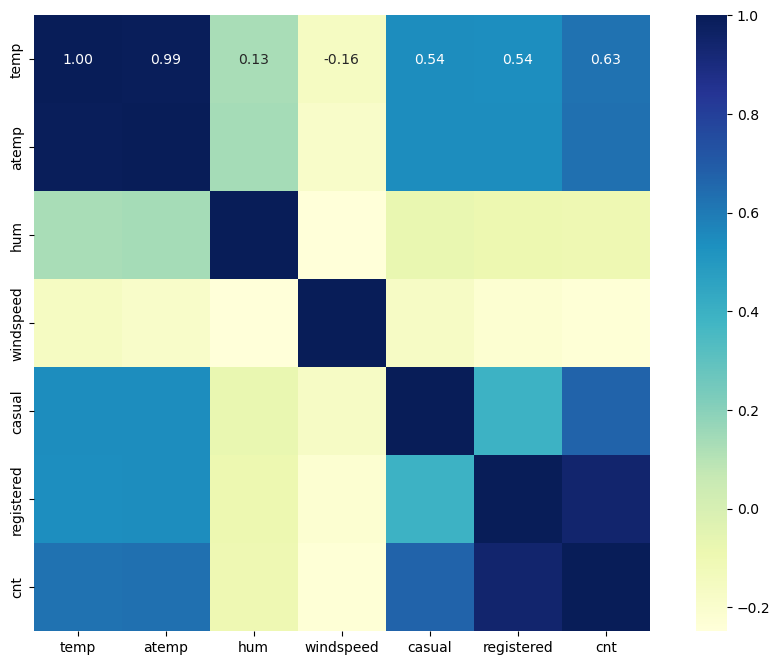

In [54]:
plt.figure(figsize = (12, 8))
num_cols=['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.heatmap(bike_sharing_df[num_cols].corr(), annot = True, cmap="YlGnBu",fmt=".2f",square=True)
plt.show()

### From the above plots we could formulate some relationship for cnt variable with numerical_columns and categorical columns:
#### 1. From the Scatterplot, pairplot and heatmaps for numerical columns we have below inferences:
#####   a.Temp and atemp has good positive correlation with cnt value also from scatterplot we can make an inference that as the temp/atemp increases the demand for bikes is increasing.
#####   b. Casual and and registered also showing good positive relationship with Bike count.
#####   c. Rest of the numerical variables like windspeed and hum don't have a good correlation with cnt.
#####   d. From pairplot and heatmap we infer temp and atemp have a strong correlation almost a perfect correlation.
#### 2. From the boxplots for categorical columns we have following inferences:
#####   a. Demand for bikes is more in clear and or Mist cloudy weather
#####   b. Count of bikes increases during the period of June to month
#####   c. Year 2019 saw increase in demand for shared bikes
#####   d. During Summerrs and Falls demand for bikes is increasing
#####   e. count values lies in wide range during holidays.

#### Data Cleaning
##### Before moving to the next steps of Modeling we can drop few columns which does not seems to useful for analysis eg:
##### dteday(date) have supporting columns like yr and month and instant is just  a serial number 
##### If see column cnt is sum of two columns casual and registered
##### So above 4 columns dteday, instant, casual and registered could be dropped

In [55]:
bike_sharing1 = bike_sharing_df.drop(['instant', 'dteday', 'registered', 'casual'], axis=1)

### Step3: Creating dummy variables for categorical columns

In [56]:
#Dropping the first columns as (p-1) dummies can explain p categories.

months_df=pd.get_dummies(bike_sharing1.mnth,drop_first=True,dtype=int)
weekdays_df=pd.get_dummies(bike_sharing1.weekday,drop_first=True,dtype=int)
seasons_df=pd.get_dummies(bike_sharing1.season,drop_first=True,dtype=int)
weather_df=pd.get_dummies(bike_sharing1.weathersit,dtype=int)

#For weathersit one of the situation heavy rainfall is currently not having any value so will not apply p-1 for the same

In [57]:
months_df

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [58]:
weekdays_df

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [59]:
seasons_df

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [60]:
weather_df

,clear,lightSnow,mistCloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,0,0,1
726,0,0,1
727,0,0,1
728,1,0,0


In [61]:
# Now concatenating the same to main dataset

bike_sharing1 = pd.concat([bike_sharing1,months_df,weekdays_df,weather_df,seasons_df],axis=1)

In [62]:
bike_sharing1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  aug         730 non-null    int64  
 13  dec         730 non-null    int64  
 14  feb         730 non-null    int64  
 15  jan         730 non-null    int64  
 16  july        730 non-null    int64  
 17  june        730 non-null    int64  
 18  mar         730 non-null    int64  
 19  may         730 non-null    i

#### We will drop the columns for which we have already created the dummy variables

In [63]:
bike_sharing = bike_sharing1.copy()

In [64]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
0,spring,0,jan,0,sat,0,mistCloudy,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,mistCloudy,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,...,0,0,1,0,1,0,0,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,...,0,0,0,1,1,0,0,1,0,0


In [65]:
bike_sharing.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

### Step3: Splitting the data into Training and Testing set

In [66]:
np.random.seed(0)
df_train, df_test = train_test_split(bike_sharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [67]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,1,0,1,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,1,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,1,0,0,0,1,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,0,0,0,0,0,1,0,1,0


In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   temp        510 non-null    float64
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   aug         510 non-null    int64  
 9   dec         510 non-null    int64  
 10  feb         510 non-null    int64  
 11  jan         510 non-null    int64  
 12  july        510 non-null    int64  
 13  june        510 non-null    int64  
 14  mar         510 non-null    int64  
 15  may         510 non-null    int64  
 16  nov         510 non-null    int64  
 17  oct         510 non-null    int64  
 18  sep         510 non-null    int64  
 19  mon         510 non-null    int64

In [69]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,20.102429,23.493909,63.112926,12.831318,4486.382353,0.096078,0.084314,...,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,7.431169,8.090038,14.156632,5.291832,1952.158739,0.294988,0.278131,...,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,20.209597,24.020400,63.437500,12.083182,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [70]:
df_train.shape

(510, 31)

In [71]:
df_test.shape

(219, 31)

#### As we can see in the above data temp, atemp, hum, windspeed and cnt have the extremes of the values 
#### We are required to Scaling for the same
### We go ahead with normalisation i.e Min-Max scaling

In [72]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [73]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,1,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,1,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,0,0,0,0,0,1,0,1,0


In [74]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.096078,0.084314,...,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.294988,0.278131,...,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


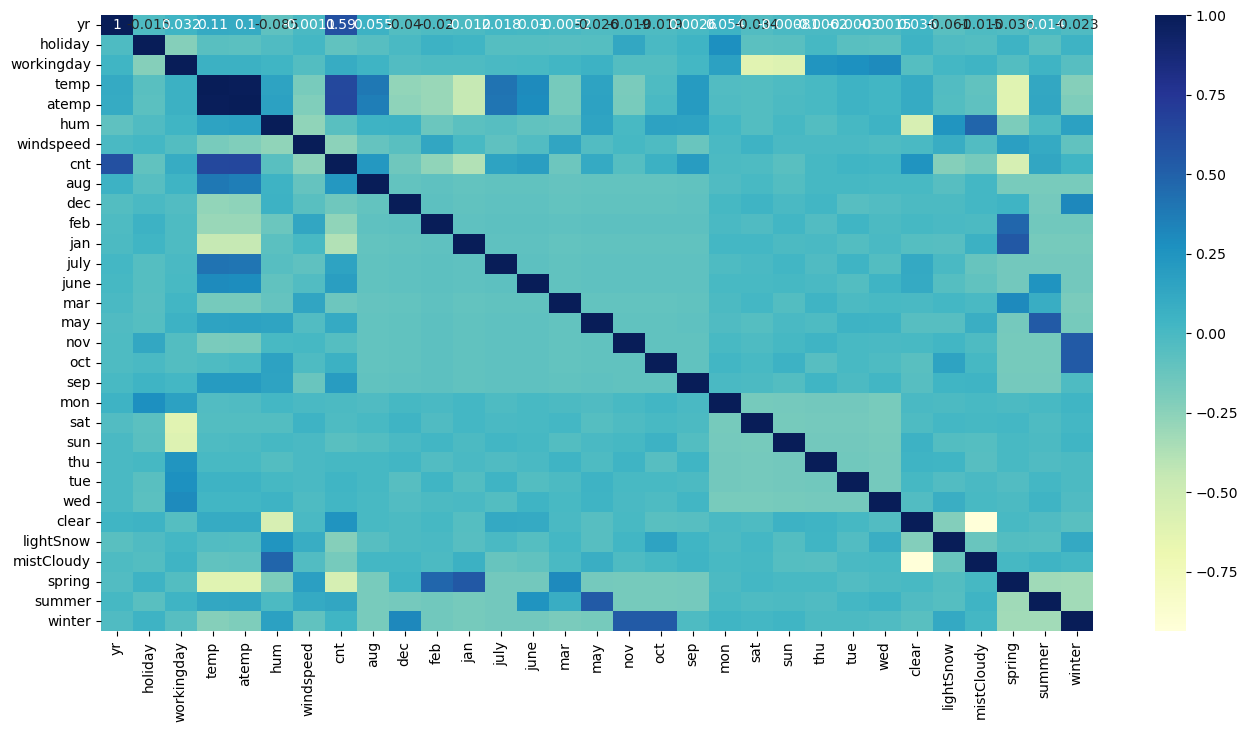

In [75]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 8))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inferences
##### atemp , temp, yr have good correlation with cnt value
##### Months June, July , may and Sept have fair correlation with cnt
##### Weather situation Clear has fair correlation with cnt
##### Season Summer and Winter seems to have fair corrleation with cnt

#### Let's scatter plot for the variables having strong correlation

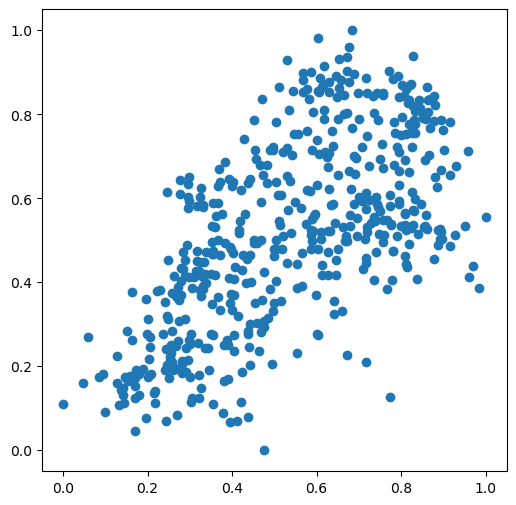

In [76]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

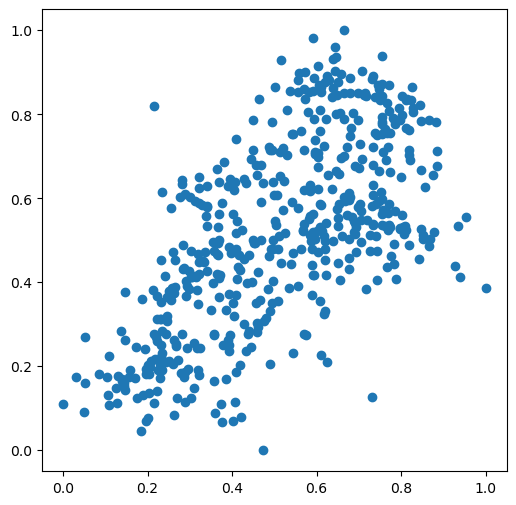

In [77]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

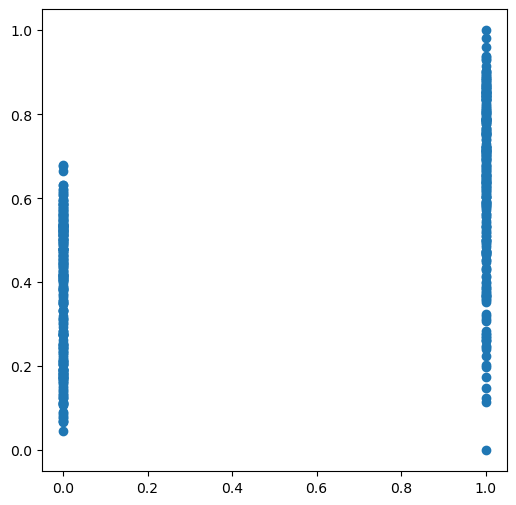

In [78]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.yr, df_train.cnt)
plt.show()

##### For temp and atemp we see a linear graph but for yr we don't see a liner graph

#### Dividing X and Y sets for building the model

In [79]:
y_train = df_train.pop('cnt')
X_train = df_train

### Step4: Modeling (Building the Linear Model)

### Firstly we will go with the lengthier approach by adding all the variables and then dropping varaible one by one based on the P-value and VIF

In [80]:
import statsmodels.api as sm


In [81]:
def train_model(X):
    X_train_lm = sm.add_constant(X)
    lr = sm.OLS(y_train, X_train_lm).fit()
    print(lr.summary())

In [95]:
def calculate_VIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [83]:
train_model(X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.42e-181
Time:                        01:43:17   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1267      0.030      4.290      0.0

#### Checking VIF

In [96]:
calculate_VIF(X_train)

,Features,VIF
1,holiday,inf
2,workingday,inf
26,mistCloudy,inf
25,lightSnow,inf
24,clear,inf
20,sun,inf
19,sat,inf
3,temp,67.12
4,atemp,56.09
27,spring,10.80


#### Dropping first set variable as we can see VIF for holiday is infinity and also p value is 0.418 which is again greater than 0.05
#### This means holiday has high collinearity with other columns

In [97]:
X_train_copy = X_train.copy()


In [98]:
X_train_copy

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,0,1,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,1,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,1,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,0,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,0,...,0,1,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,1,...,0,0,0,1,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [99]:
X1=X_train_copy.drop('holiday',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.42e-181
Time:                        01:51:48   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1125      0.041      2.751      0.0

##### We can notice not much difference in th R-squared value and adjusted r-sqaured value, let's find the VIF value again

In [101]:
calculate_VIF(X1)

,Features,VIF
23,clear,111.00
2,temp,67.12
25,mistCloudy,66.04
3,atemp,56.09
26,spring,10.80
1,workingday,10.15
28,winter,9.52
27,summer,8.31
18,sat,7.82
19,sun,7.36


#### Now we see a great improvement in VIF values, earlier we saw infinite values as below
#### mistCloudy	inf
#### lightSnow	inf
#### clear	inf
#### sun	inf
#### sat	inf

#### Now clear is VIF 111

#### Note: R-sqaured value and adjusted R square value is still the same

In [102]:
# Variable 'clear' has high VIF value i.e. 111 but low p value 0.00 let's check some other variable atmep has VIF 56.09 
# and also the p value as 0.714 which is quite high and also looks like temp and atemp are highly collinear, Let's drop atemp

X1=X1.drop('atemp',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.74e-182
Time:                        01:54:16   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1117      0.041      2.737      0.0

##### Still the R-sqaured value and Adj. R squared value is intact as 0.853 and 0.845 resepctively

In [103]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
22,clear,110.76
24,mistCloudy,65.90
25,spring,10.79
1,workingday,10.10
27,winter,9.50
26,summer,8.29
17,sat,7.75
18,sun,7.30
2,temp,7.12
23,lightSnow,7.11


#### Still 'clear' and 'mistCloudy' are having high VIF values though their P-values are 0.00 let's target 3rd variable in the list i.e 'spring' with VIF 10.79 and p-value 0.109

In [104]:
X1=X1.drop('spring',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.99e-182
Time:                        01:55:22   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -999.2
Df Residuals:                     483   BIC:                            -884.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0898      0.039      2.331      0.0

#### R-squared = 0.853 and Adj. R-squared:0.845 value is same as previous iteration

In [105]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
22,clear,96.20
24,mistCloudy,58.23
1,workingday,10.09
17,sat,7.75
18,sun,7.30
2,temp,7.01
13,nov,6.79
14,oct,6.59
23,lightSnow,6.54
26,winter,6.08


In [106]:
# Dropping 'june' on the basis of high P-value
X1=X1.drop('june',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.84e-183
Time:                        01:56:42   Log-Likelihood:                 526.57
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     484   BIC:                            -891.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0903      0.038      2.354      0.0

#### R-squared = 0.853 and Adj. R-squared:0.845 value is same as previous iteration

In [107]:
# Let's find the VIF again
vif = pd.DataFrame()
calculate_VIF(X1)

,Features,VIF
21,clear,95.67
23,mistCloudy,57.87
1,workingday,10.06
16,sat,7.71
17,sun,7.27
22,lightSnow,6.51
12,nov,6.22
25,winter,6.08
13,oct,5.67
2,temp,5.39


In [108]:
# Dropping 'nov' on the basis of high P-value and high VIF
X1=X1.drop('nov',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.41e-184
Time:                        01:57:59   Log-Likelihood:                 525.80
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     485   BIC:                            -895.7
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0716      0.035      2.037      0.0

In [109]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
20,clear,77.69
22,mistCloudy,48.60
1,workingday,9.87
15,sat,7.60
16,sun,7.16
21,lightSnow,5.73
2,temp,4.57
24,winter,3.62
8,jan,3.30
23,summer,3.21


#### As we are dropping the variables VIF values for 'clear' are also coming down this means that clear has collinearity with other variables let's drop 'mar' having highest p-value '0.991'

In [110]:
# Dropping 'mar' on the basis of high P-value
X1=X1.drop('mar',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.85e-185
Time:                        01:59:24   Log-Likelihood:                 525.80
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     486   BIC:                            -902.0
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0717      0.034      2.135      0.0

#### R-squared:0.852 and Adj. R-squared:0.845

In [111]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
19,clear,69.76
21,mistCloudy,44.37
1,workingday,9.82
14,sat,7.57
15,sun,7.15
20,lightSnow,5.39
2,temp,3.87
22,summer,2.83
23,winter,2.68
5,aug,2.23


##### As we see VIF for 'clear' and 'mistCloudy' decreased we will drop another high p-value variable with high VIF 'sun'

In [112]:
# Dropping 'sun' on the basis of high P-value
X1=X1.drop('sun',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.19e-186
Time:                        02:01:04   Log-Likelihood:                 524.98
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     487   BIC:                            -906.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0958      0.028      3.480      0.0

#### R-squared:0.852 and Adj. R-squared:0.845

In [113]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
18,clear,42.85
20,mistCloudy,29.92
19,lightSnow,4.08
2,temp,3.87
21,summer,2.83
22,winter,2.68
1,workingday,2.55
5,aug,2.23
8,jan,2.20
9,july,2.18


#### Value of VIF for 'clear' and 'mistCloudy'  further decreased we will drop another high p-value variable i.e. 'july'

In [114]:
# Dropping 'july' on the basis of high P-value
X1=X1.drop('july',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          8.70e-187
Time:                        02:02:20   Log-Likelihood:                 524.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     488   BIC:                            -912.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0958      0.028      3.483      0.0

#### R-squared:0.852 and Adj. R-squared:0.845

In [115]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
17,clear,42.83
19,mistCloudy,29.92
18,lightSnow,4.08
2,temp,2.84
21,winter,2.56
1,workingday,2.55
20,summer,2.25
8,jan,2.19
3,hum,1.97
16,wed,1.80


##### Value of VIF for 'clear' and 'mistCloudy' didn't change further but let's try dropping another high p-value variable i.e. 'wed'

In [116]:
# Dropping 'wed' on the basis of high P-value
X1=X1.drop('wed',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.38e-188
Time:                        02:03:06   Log-Likelihood:                 524.60
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     489   BIC:                            -918.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0956      0.027      3.478      0.0

#### R-squared:0.851 and Adj. R-squared:0.845 is decreased a bit but not in a very considerable manner

In [117]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
16,clear,42.83
18,mistCloudy,29.91
17,lightSnow,4.07
2,temp,2.84
20,winter,2.56
19,summer,2.25
8,jan,2.19
3,hum,1.97
1,workingday,1.92
7,feb,1.69


##### We see the 'clear' and 'mistCloudy' are not further decreased, we will drop 'clear' now since VIF 42.83 is quite high

In [118]:
# Dropping 'clear' on the basis of high P-value
X1=X1.drop('clear',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.38e-188
Time:                        02:05:38   Log-Likelihood:                 524.60
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     489   BIC:                            -918.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2323      0.032      7.188      0.0

#### R-squared:0.851 and Adj. R-squared:0.845

In [119]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
3,hum,25.03
2,temp,14.75
1,workingday,5.52
4,windspeed,4.10
19,winter,3.12
18,summer,2.80
17,mistCloudy,2.23
0,yr,2.08
8,jan,1.96
13,sat,1.85


##### Now we see 'hum' and 'temp' VIF values increases after dropping 'clear', we see 'thu' has high p-value '0.463'. We will drop 'thu' this time

In [120]:
# Dropping 'thu' on the basis of high P-value
X1=X1.drop('thu',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.95e-189
Time:                        02:06:41   Log-Likelihood:                 524.32
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.0
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2311      0.032      7.164      0.0

#### R-squared:0.851 and Adj. R-squared:0.845

In [121]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
3,hum,25.01
2,temp,14.75
1,workingday,5.02
4,windspeed,4.10
18,winter,3.12
17,summer,2.80
16,mistCloudy,2.22
0,yr,2.08
8,jan,1.96
13,sat,1.85


##### We see 'hum' and 'temp' VIF values remains same, we will drop 'hum' having high VIF value '25.01'

In [122]:
# Dropping 'hum' on the basis of high VIF
X1=X1.drop('hum',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     149.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.02e-186
Time:                        02:07:58   Log-Likelihood:                 515.17
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     491   BIC:                            -911.9
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1457      0.026      5.692      0.0

#### We see R-squared value is reduced to '0.846' and Adj. R-squared reduced to '0.840'

In [123]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
2,temp,6.77
1,workingday,4.90
3,windspeed,4.06
16,summer,2.62
17,winter,2.55
0,yr,2.08
12,sat,1.83
9,oct,1.81
4,aug,1.65
8,may,1.59


##### We see that the 'temp' VIF value has come down to '6.77' let's target another high p-value variable 'may' having value '0.474'

In [124]:
# Dropping 'may' on the basis of high p value
X1=X1.drop('may',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.5
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.06e-187
Time:                        02:09:55   Log-Likelihood:                 514.90
No. Observations:                 510   AIC:                            -993.8
Df Residuals:                     492   BIC:                            -917.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1441      0.025      5.654      0.0

#### R-squared value is '0.846' and Adj. R-squared is '0.840'

In [125]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
2,temp,6.64
1,workingday,4.90
3,windspeed,3.99
16,winter,2.55
15,summer,2.10
0,yr,2.07
11,sat,1.82
8,oct,1.81
4,aug,1.64
14,mistCloudy,1.59


##### 'temp' VIF value is '6.64' now let's drop another high p-value variable i.e. 'tue' --> 0.180

In [126]:
# Dropping 'tue' on the basis of high p value
X1=X1.drop('tue',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          9.40e-188
Time:                        02:11:49   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -993.9
Df Residuals:                     493   BIC:                            -922.0
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1446      0.026      5.666      0.0

#### R-squared value is '0.845' and Adj. R-squared is '0.840'

In [127]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
2,temp,6.63
1,workingday,4.59
3,windspeed,3.99
15,winter,2.55
14,summer,2.10
0,yr,2.07
11,sat,1.82
8,oct,1.81
4,aug,1.64
13,mistCloudy,1.59


##### We see 'temp' VIF is '6.63' and still we have few variables having high p-value let's drop 'dec'

In [128]:
# Dropping 'dec' on the basis of high p value
X1=X1.drop('dec',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.23e-188
Time:                        02:13:05   Log-Likelihood:                 512.75
No. Observations:                 510   AIC:                            -993.5
Df Residuals:                     494   BIC:                            -925.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1313      0.024      5.462      0.0

#### R-squared value is '0.844' and Adj. R-squared is '0.840'

In [129]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
2,temp,6.60
1,workingday,4.50
3,windspeed,3.97
14,winter,2.22
0,yr,2.07
13,summer,2.06
10,sat,1.79
4,aug,1.63
7,oct,1.61
12,mistCloudy,1.58


##### We see 'temp' VIF is '6.60' and still we have few variables having high p-value let's drop 'feb'

In [130]:
# Dropping 'feb' on the basis of high p value
X1=X1.drop('feb',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.27e-189
Time:                        02:14:30   Log-Likelihood:                 511.72
No. Observations:                 510   AIC:                            -993.4
Df Residuals:                     495   BIC:                            -929.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1149      0.021      5.449      0.0

#### R-squared value is '0.844' and Adj. R-squared is '0.840'

In [131]:
# Let's find the VIF again
vif = pd.DataFrame()
calculate_VIF(X1)

,Features,VIF
2,temp,6.49
1,workingday,4.38
3,windspeed,3.61
13,winter,2.10
0,yr,2.05
12,summer,1.91
9,sat,1.77
4,aug,1.61
6,oct,1.61
11,mistCloudy,1.57


##### We see 'temp' VIF is '6.49' and still we have few variables having high p-value let's drop 'mon'

In [132]:
# Dropping 'mon' on the basis of high p value
X1=X1.drop('mon',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.27e-189
Time:                        02:16:28   Log-Likelihood:                 510.20
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     496   BIC:                            -933.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1129      0.021      5.351      0.0

#### R-squared value is '0.843' and Adj. R-squared is '0.839'
#### Finally we see all the variables with less than p-value 0.05

In [133]:
# Let's find the VIF again
calculate_VIF(X1)

,Features,VIF
2,temp,6.49
1,workingday,4.32
3,windspeed,3.61
12,winter,2.09
0,yr,2.05
11,summer,1.91
8,sat,1.76
4,aug,1.61
6,oct,1.61
10,mistCloudy,1.57


In [134]:
# Dropping 'temp' on the basis of high VIF 6.49
X1=X1.drop('temp',axis=1)
train_model(X1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     107.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.48e-129
Time:                        02:20:50   Log-Likelihood:                 364.16
No. Observations:                 510   AIC:                            -702.3
Df Residuals:                     497   BIC:                            -647.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4038      0.020     20.248      0.0

#### We see a considerable drop in R sqaured value to 0.721 which is decreasing the model performance, better we keep the variable 'temp'

In [135]:
# Let's create dataframe having all the above vraibles + 'temp'
X2 = X_train_copy[['yr','workingday','windspeed','aug','jan','oct','sep','sat','lightSnow','mistCloudy','summer','winter','temp']]
X2

,yr,workingday,windspeed,aug,jan,oct,sep,sat,lightSnow,mistCloudy,summer,winter,temp
653,1,1,0.300794,0,0,1,0,0,0,0,0,1,0.509887
576,1,1,0.264686,0,0,0,0,0,0,0,0,0,0.815169
426,1,0,0.255342,0,0,0,0,1,0,1,0,0,0.442393
728,1,0,0.663106,0,0,0,0,0,0,0,0,0,0.245101
482,1,0,0.188475,0,0,0,0,1,0,1,1,0,0.395666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,1,0.355596,0,0,0,0,0,0,1,1,0,0.824514
578,1,1,0.187140,1,0,0,0,0,0,0,0,0,0.863973
53,0,1,0.111379,0,0,0,0,0,0,0,0,0,0.202618
350,0,0,0.431816,0,0,0,0,1,0,1,0,1,0.248216


#### Let's train the model with DataFrame X2 having the temp

In [136]:
X_train_lm = sm.add_constant(X2)
lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.27e-189
Time:                        02:22:29   Log-Likelihood:                 510.20
No. Observations:                 510   AIC:                            -992.4
Df Residuals:                     496   BIC:                            -933.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1129      0.021      5.351      0.0

In [137]:
# Let's find the VIF again just to cross check
calculate_VIF(X2)

,Features,VIF
12,temp,6.49
1,workingday,4.32
2,windspeed,3.61
11,winter,2.09
0,yr,2.05
10,summer,1.91
7,sat,1.76
3,aug,1.61
5,oct,1.61
9,mistCloudy,1.57


### So we have final R-squared:0.843 which quite good for the model prediction with all the variables having p-value < 0.05 and VIF <5 except temp which is quite important for model prediction

#### Step 5: Residual Analysis of the train data

In [138]:
y_train_count = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

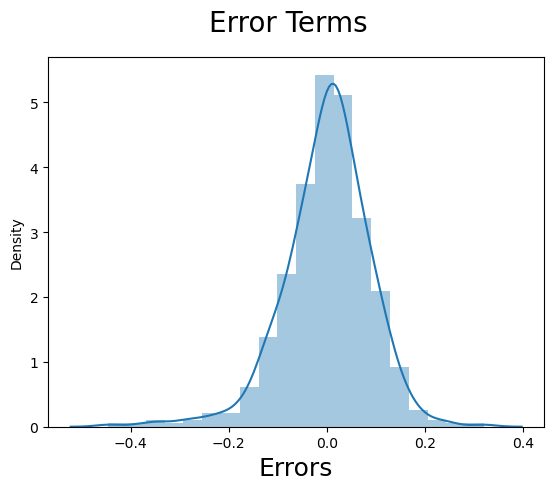

In [139]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

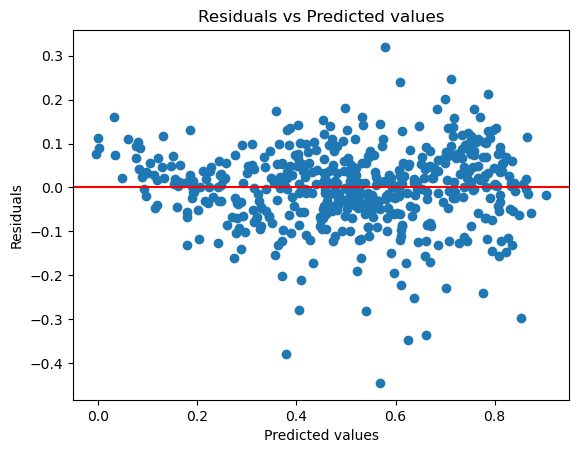

In [140]:
plt.scatter(y_train_count, y_train - y_train_count)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.show()

#### Doing above residual analyis we can say the model has homoscedasticity and Normality
#### There's constant variance of errors

#### We do normalization using Min-Max Scaling for test data

In [141]:
scaler = MinMaxScaler()
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [142]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.546312,0.530942,0.508750,0.418870,0.516216,0.059361,0.086758,...,0.146119,0.164384,0.164384,0.100457,0.652968,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.249189,0.228159,0.201253,0.188111,0.238702,0.236840,0.282125,...,0.354034,0.371472,0.371472,0.301297,0.477117,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.328479,0.333829,0.358469,0.283817,0.359882,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.546045,0.547913,0.494200,0.402533,0.520241,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759735,0.720622,0.651165,0.524362,0.682487,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing X_test and y_test

In [143]:
y_test = df_test.pop('cnt')
X_test = df_test

In [144]:
X_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0,0,0,...,0,0,0,1,1,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0,0,0,...,0,1,0,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,1,0,0,...,0,0,0,1,1,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.224955,0.227731,0.603829,0.388364,0,0,1,...,1,0,0,0,0,0,1,1,0,0
702,1,0,1,0.503971,0.508864,0.667633,0.383644,0,1,0,...,0,0,1,0,1,0,0,0,0,1
127,0,0,0,0.573725,0.577423,0.525522,0.132095,0,0,0,...,1,0,0,0,1,0,0,0,1,0
640,1,0,1,0.745342,0.687659,0.751160,0.111637,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [145]:
X_test_copy=X_test.copy()

In [146]:
X_test_copy

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0,0,0,...,0,0,0,1,1,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0,0,0,...,0,1,0,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,1,0,0,...,0,0,0,1,1,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.224955,0.227731,0.603829,0.388364,0,0,1,...,1,0,0,0,0,0,1,1,0,0
702,1,0,1,0.503971,0.508864,0.667633,0.383644,0,1,0,...,0,0,1,0,1,0,0,0,0,1
127,0,0,0,0.573725,0.577423,0.525522,0.132095,0,0,0,...,1,0,0,0,1,0,0,0,1,0
640,1,0,1,0.745342,0.687659,0.751160,0.111637,0,0,0,...,0,0,0,1,0,0,1,0,0,1


##### Creating a new dataframe from X_test_copy having same varaibles as in train model dataframe

In [147]:
X4=X_test_copy[['yr','workingday','windspeed','aug','jan','oct','sep','sat','lightSnow','mistCloudy','summer','winter','temp']]
X4

,yr,workingday,windspeed,aug,jan,oct,sep,sat,lightSnow,mistCloudy,summer,winter,temp
184,0,0,0.149393,0,0,0,0,0,0,1,0,0,0.837241
535,1,1,0.231142,0,0,0,0,0,0,0,1,0,0.911423
299,0,1,0.443398,0,0,1,0,0,0,1,0,1,0.496221
221,0,1,0.449707,1,0,0,0,0,0,0,0,0,0.890387
152,0,1,0.682387,0,0,0,0,0,0,0,1,0,0.821739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0.388364,0,0,0,0,0,0,1,0,0,0.224955
702,1,1,0.383644,0,0,0,0,0,0,0,0,1,0.503971
127,0,0,0.132095,0,0,0,0,0,0,0,1,0,0.573725
640,1,1,0.111637,0,0,1,0,0,0,1,0,1,0.745342


In [148]:
#Adding constant
X_test_lm = sm.add_constant(X4)

In [149]:
y_pred = lr.predict(X_test_lm)

#### Step 6: Model Evaluation

In [150]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test, y_pred)
R2_Squared = round(r2,4)
print(R2_Squared)

0.7907


#### So for Training model we have R2 squared value as 0.834 and from  test model we have R2 Squared value 0.79 both are quite good for predictions without having much difference

Text(0, 0.5, 'y_pred')

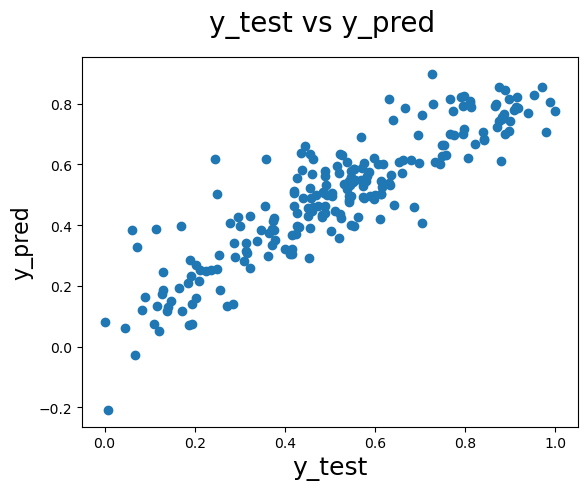

In [151]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

#### If we observe scatter plot we see y_test and y_pred also have quite a good relationship.

In [152]:
lr.params

const         0.112938
yr            0.234122
workingday    0.055666
windspeed    -0.162600
aug           0.052522
jan          -0.046870
oct           0.042123
sep           0.114841
sat           0.066580
lightSnow    -0.295676
mistCloudy   -0.083933
summer        0.093764
winter        0.112539
temp          0.481486
dtype: float64

### Below is the final equation for the bike's count

### cnt = 0.113 + 0.481×temp + 0.113×winter + 0.094×summer - 0.084×mistCloudy - 0.296×lightSnow + 0.067×sat + 0.115×sep + 0.042×oct - 0.047×jan + 0.053×aug - 0.163×windspeed + 0.056×workingday + 0.234×yr

In [153]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X4.shape[1]-1),4)
print(adjusted_r2)

0.7774


### Final Summary

In [ ]:
1. Train dataset R^2 : 0.843
2. Test dataset R^2 : 0.791
3. Train dataset Adjusted R^2 : 0.839
4. Test dataset Adjusted R^2 : 0.777

## Inferences
#### Company should focus on Winter and Summer Season to expand the business as the demand is high
#### Demand for bikes is less in Mist Cloudy and Light snow weather situations. So not a right time for business
#### On Saturdays the demand for shared bike is high
#### Months Aug, Sep , Oct are good for shared bike business whereas in January the business is showing downward trend
#### If WindSpeed is high demand for bike is less
#### On Workingdays demand for bike is high
#### Year 2019 has seen a higher demand for shared bikes compared to 2018.

#### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

##                                                         RFE(Recursive feature elimination)

### Now let's try to build the Model in much quicker way using RFE, and let's try to match how much accuracy we are getting

In [154]:
# We have already completed till the re-scaling part as part of previous model building, let's check the value of y_train and X_train
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [155]:
y_train.shape

(510,)

In [156]:
X_train

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,0,1,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,1,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,1,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,0,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,0,...,0,1,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,1,...,0,0,0,1,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [157]:
X_train_copy

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,0,1,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,1,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,1,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,0,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,0,...,0,1,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,1,...,0,0,0,1,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [158]:
# Let's create copy of X_train and y_train
X_train_rfe=X_train.copy()
y_train_rfe=y_train.copy()

In [159]:
X_train_rfe

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,0,1,0,1,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,1,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,1,0,0,0,1,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,0,0,...,0,0,0,0,0,0,1,0,1,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,1,0,0,...,0,1,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,0,0,1,...,0,0,0,1,1,0,0,1,0,0
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [160]:
y_train_rfe

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

### Step 1: Getting the top 15 variables using RFE

In [161]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [162]:
# Running RFE with the output number of the variable equal to 15
lm_rfe = LinearRegression()
lm_rfe.fit(X_train_rfe, y_train_rfe)

rfe = RFE(estimator=lm_rfe, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train_rfe, y_train_rfe)

In [163]:
#List of variables selected in top 15
# Variables with True are the selected one's
list(zip(X_train_rfe.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 5),
 ('feb', False, 6),
 ('jan', False, 3),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 13),
 ('may', False, 7),
 ('nov', False, 4),
 ('oct', False, 15),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 12),
 ('tue', False, 10),
 ('wed', False, 16),
 ('clear', True, 1),
 ('lightSnow', True, 1),
 ('mistCloudy', True, 1),
 ('spring', False, 2),
 ('summer', True, 1),
 ('winter', True, 1)]

In [164]:
# Putting the selected variable via RFE in col list
selected_col=X_train_rfe.columns[rfe.support_]
selected_col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'sat', 'sun', 'clear', 'lightSnow', 'mistCloudy', 'summer',
       'winter'],
      dtype='object')

In [165]:
# putting the rejected variables via RFE in col list
rejected_col=X_train_rfe.columns[~rfe.support_]
rejected_col

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed', 'spring'],
      dtype='object')

### Step 2 : Building the model 

In [166]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe1 = X_train_rfe[selected_col]

In [167]:
def run_linear_model(X_train_rf):
    # Add a constant to the feature set
    X_train_rf = sm.add_constant(X_train_rf)
    # Fit the OLS linear regression model
    lm_rfe = sm.OLS(y_train_rfe, X_train_rf).fit()
    # Print the summary of the model
    print(lm_rfe.summary())

In [168]:
# Running the 1st model
run_linear_model(X_train_rfe1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.77e-191
Time:                        02:31:05   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0578      0.021      2.813      0.0

#### R-squared: 0.845 and Adj. R-squared: 0.841 and 'sun' has high p-value of 0.635

In [169]:
# Function for Calculating VIF
def find_VIF(X1):
    vif = pd.DataFrame()
    vif['Features'] = X1.columns
    vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [170]:
print(find_VIF(X_train_rfe1))

      Features   VIF
1      holiday   inf
2   workingday   inf
8          sat   inf
9          sun   inf
10       clear   inf
11   lightSnow   inf
12  mistCloudy   inf
4          hum  1.89
3         temp  1.60
6         july  1.43
13      summer  1.33
14      winter  1.29
7          sep  1.19
5    windspeed  1.18
0           yr  1.03


#### We see the VIF for starting few variables is infinity which is not an ideal case, let's drop 'sun' and see if VIF changes

In [171]:
X_train_rfe2 = X_train_rfe1.drop(['sun'], axis = 1)

In [172]:
# Running the 2nd model
run_linear_model(X_train_rfe2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.77e-191
Time:                        02:31:44   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0619      0.025      2.432      0.0

#### R-squared: 0.845 and Adj. R-squared: 0.841 with no high p-values

In [173]:
# Printing the VIF's for second model
print(find_VIF(X_train_rfe2))

      Features    VIF
9        clear  33.02
11  mistCloudy  24.81
10   lightSnow   3.68
4          hum   1.89
2   workingday   1.88
8          sat   1.78
3         temp   1.60
6         july   1.43
12      summer   1.33
13      winter   1.29
7          sep   1.19
5    windspeed   1.18
1      holiday   1.16
0           yr   1.03


#### VIF values for 'clear' and 'mistCloudy' is really high let's drop clear first

In [174]:
X_train_rfe3 = X_train_rfe2.drop(['clear'], axis = 1)

In [175]:
# Running the 3rd model
run_linear_model(X_train_rfe3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.77e-191
Time:                        02:32:12   Log-Likelihood:                 514.15
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     496   BIC:                            -941.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1815      0.029      6.311      0.0

#### R-squared: 0.845 and Adj. R-squared: 0.841

In [176]:
# Printing the VIF's for third model
print(find_VIF(X_train_rfe3))

      Features    VIF
4          hum  16.73
3         temp  10.35
2   workingday   5.02
5    windspeed   3.79
10  mistCloudy   2.11
0           yr   2.03
8          sat   1.90
11      summer   1.76
12      winter   1.71
6         july   1.55
7          sep   1.29
1      holiday   1.16
9    lightSnow   1.16


#### IF values for 'hum' and 'temp' is really high let's drop 'hum' first

In [177]:
X_train_rfe4 = X_train_rfe3.drop(['hum'], axis = 1)

In [178]:
# Running the 4th model
run_linear_model(X_train_rfe4)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.92e-188
Time:                        02:32:25   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     497   BIC:                            -926.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0818      0.019      4.280      0.0

#### R-squared: 0.839 and Adj. R-squared: 0.835 both dropped from previous iteration

In [179]:
# Printing the VIF's for fourth model
print(find_VIF(X_train_rfe4))

      Features   VIF
3         temp  6.47
2   workingday  4.38
4    windspeed  3.57
0           yr  2.02
7          sat  1.77
10      summer  1.75
9   mistCloudy  1.54
5         july  1.53
11      winter  1.49
6          sep  1.29
1      holiday  1.12
8    lightSnow  1.08


#### Let's try dropping 'temp' since the VIF is on higher side

In [180]:
X_train_rfe5 = X_train_rfe4.drop(['temp'], axis = 1)

In [ ]:
# Running the 5th model
#run_linear_model(X_train_rfe5)

In [181]:
lr_final5 = LinearRegression()
X_train_rfe5 = sm.add_constant(X_train_rfe5)
# Fit the OLS linear regression model
lr_final5 = sm.OLS(y_train_rfe, X_train_rfe5).fit()
# Print the summary of the model
print(lr_final5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     74.08
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           2.14e-97
Time:                        02:32:51   Log-Likelihood:                 285.70
No. Observations:                 510   AIC:                            -547.4
Df Residuals:                     498   BIC:                            -496.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3760      0.024     15.983      0.0

In [182]:
print(find_VIF(X_train_rfe5))

      Features    VIF
0        const  14.43
3   workingday   1.87
7          sat   1.77
10      summer   1.25
11      winter   1.23
2      holiday   1.16
5         july   1.14
6          sep   1.08
4    windspeed   1.06
8    lightSnow   1.05
9   mistCloudy   1.04
1           yr   1.01


#### We see R-squared: 0.621 and Adj. R-squared: 0.612 dropping a lot this shows even though 'temp' has multicollinearity but it's an important factor in model performance

In [183]:
# Running the 4th model again
lr_final = LinearRegression()
X_train_rfe4 = sm.add_constant(X_train_rfe4)
# Fit the OLS linear regression model
lr_final = sm.OLS(y_train_rfe, X_train_rfe4).fit()
# Print the summary of the model
print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.92e-188
Time:                        02:34:18   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     497   BIC:                            -926.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0818      0.019      4.280      0.0

#### Final R-squared: 0.839 and Adj. R-squared: 0.835

### Step3 Residual analysis of the train data

In [184]:
y_train_bikecnt = lr_final.predict(X_train_rfe4)

Text(0.5, 0, 'Errors')

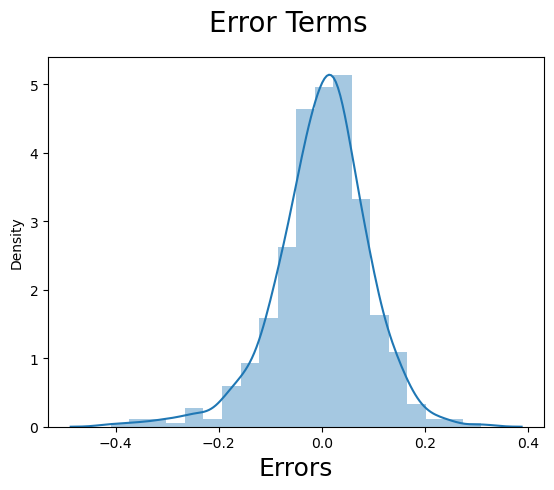

In [185]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_rfe - y_train_bikecnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

#### Step 4: Making Predictions

In [ ]:
# Creating a new data frame with final set of columns which we had in training model

In [186]:
X_test_copy

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sun,thu,tue,wed,clear,lightSnow,mistCloudy,spring,summer,winter
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0,0,0,...,0,0,0,1,1,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0,0,0,...,0,1,0,0,0,0,1,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,1,0,0,...,0,0,0,1,1,0,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.224955,0.227731,0.603829,0.388364,0,0,1,...,1,0,0,0,0,0,1,1,0,0
702,1,0,1,0.503971,0.508864,0.667633,0.383644,0,1,0,...,0,0,1,0,1,0,0,0,0,1
127,0,0,0,0.573725,0.577423,0.525522,0.132095,0,0,0,...,1,0,0,0,1,0,0,0,1,0
640,1,0,1,0.745342,0.687659,0.751160,0.111637,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [187]:
X5=X_test_copy[['yr','workingday','windspeed','holiday','july','sep','sat','lightSnow','mistCloudy','summer','winter','temp']]
X5

,yr,workingday,windspeed,holiday,july,sep,sat,lightSnow,mistCloudy,summer,winter,temp
184,0,0,0.149393,1,1,0,0,0,1,0,0,0.837241
535,1,1,0.231142,0,0,0,0,0,0,1,0,0.911423
299,0,1,0.443398,0,0,0,0,0,1,0,1,0.496221
221,0,1,0.449707,0,0,0,0,0,0,0,0,0.890387
152,0,1,0.682387,0,0,0,0,0,0,1,0,0.821739
...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0.388364,0,0,0,0,0,1,0,0,0.224955
702,1,1,0.383644,0,0,0,0,0,0,0,1,0.503971
127,0,0,0.132095,0,0,0,0,0,0,1,0,0.573725
640,1,1,0.111637,0,0,0,0,0,1,0,1,0.745342


In [188]:
X_test_rfe=sm.add_constant(X5)

In [189]:
X_test_rfe

,const,yr,workingday,windspeed,holiday,july,sep,sat,lightSnow,mistCloudy,summer,winter,temp
184,1.0,0,0,0.149393,1,1,0,0,0,1,0,0,0.837241
535,1.0,1,1,0.231142,0,0,0,0,0,0,1,0,0.911423
299,1.0,0,1,0.443398,0,0,0,0,0,1,0,1,0.496221
221,1.0,0,1,0.449707,0,0,0,0,0,0,0,0,0.890387
152,1.0,0,1,0.682387,0,0,0,0,0,0,1,0,0.821739
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.388364,0,0,0,0,0,1,0,0,0.224955
702,1.0,1,1,0.383644,0,0,0,0,0,0,0,1,0.503971
127,1.0,0,0,0.132095,0,0,0,0,0,0,1,0,0.573725
640,1.0,1,1,0.111637,0,0,0,0,0,1,0,1,0.745342


In [190]:
# Making predictions
y_pred_BikeCnt = lr_final.predict(X_test_rfe)

Text(0, 0.5, 'y_pred')

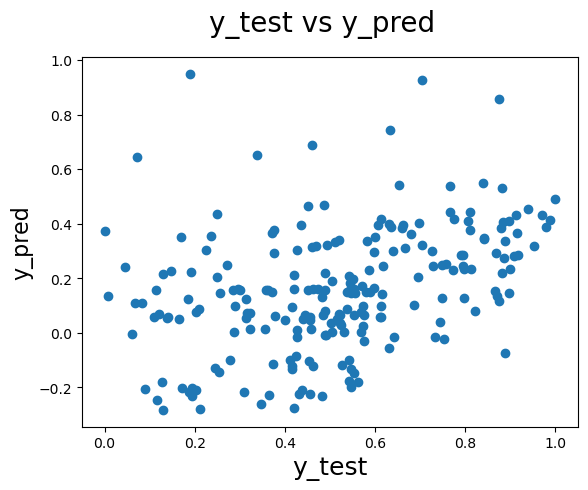

In [191]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_BikeCnt)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [192]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test, y_pred_BikeCnt)
R2_Squa = round(r2,4)
print(R2_Squa)

-2.4144


### This is quite unusual R2 sqauerd value so high and also negative, let's revisit the Training model again and see if there a any variables which can be responsible, and compare our learnings with the manual model which we built earlier

In [193]:
# Running the 4th model again
lr_final = LinearRegression()
X_train_rfe4 = sm.add_constant(X_train_rfe4)
# Fit the OLS linear regression model
lr_final = sm.OLS(y_train_rfe, X_train_rfe4).fit()
# Print the summary of the model
print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.92e-188
Time:                        02:36:58   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -981.3
Df Residuals:                     497   BIC:                            -926.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0818      0.019      4.280      0.0

#### There is one variable which we didn't see in manual model which we built earlier i.e 'holiday' let's drop that and rebuild the train model

In [194]:
X_train_rfe6 = X_train_rfe4.drop(['holiday'], axis = 1)

In [ ]:
# cnt = 0.113 + 0.481×temp + 0.113×winter + 0.094×summer - 0.084×mistCloudy - 0.296×lightSnow + 0.067×sat + 0.115×sep + 0.042×oct - 0.047×jan + 0.053×aug - 0.163×windspeed + 0.056×workingday + 0.234×yr

In [195]:
# Running the model again
lr_final6 = LinearRegression()
X_train_rfe6 = sm.add_constant(X_train_rfe6)
# Fit the OLS linear regression model
lr_final6 = sm.OLS(y_train_rfe, X_train_rfe6).fit()
# Print the summary of the model
print(lr_final6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     232.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          3.02e-188
Time:                        02:37:26   Log-Likelihood:                 501.31
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     498   BIC:                            -927.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0720      0.019      3.867      0.0

In [196]:
print(find_VIF(X_train_rfe6))

      Features    VIF
0        const  21.04
2   workingday   1.65
7          sat   1.63
3         temp   1.50
5         july   1.42
10      summer   1.32
11      winter   1.25
6          sep   1.18
4    windspeed   1.09
8    lightSnow   1.05
9   mistCloudy   1.05
1           yr   1.02


In [197]:
# Dropping july as well as p-value is little bit on higher side
X_train_rfe7 = X_train_rfe6.drop(['july'], axis = 1)

In [198]:
# Running the model again
lr_final7 = LinearRegression()
X_train_rfe7 = sm.add_constant(X_train_rfe7)
# Fit the OLS linear regression model
lr_final7 = sm.OLS(y_train_rfe, X_train_rfe7).fit()
# Print the summary of the model
print(lr_final7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.47e-188
Time:                        02:37:41   Log-Likelihood:                 499.18
No. Observations:                 510   AIC:                            -976.4
Df Residuals:                     499   BIC:                            -929.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0753      0.019      4.051      0.0

In [199]:
print(find_VIF(X_train_rfe7))

      Features    VIF
0        const  20.87
2   workingday   1.64
6          sat   1.63
3         temp   1.20
10      winter   1.20
9       summer   1.19
5          sep   1.10
4    windspeed   1.09
7    lightSnow   1.05
8   mistCloudy   1.04
1           yr   1.02


In [ ]:
# VIF for const is high we can ignore the same.

#### Final R-squared: 0.836 and Adj. R-squared: 0.832

#### Doing the residual analysis again

In [200]:
y_train_bikeCount = lr_final7.predict(X_train_rfe7)

Text(0.5, 0, 'Errors')

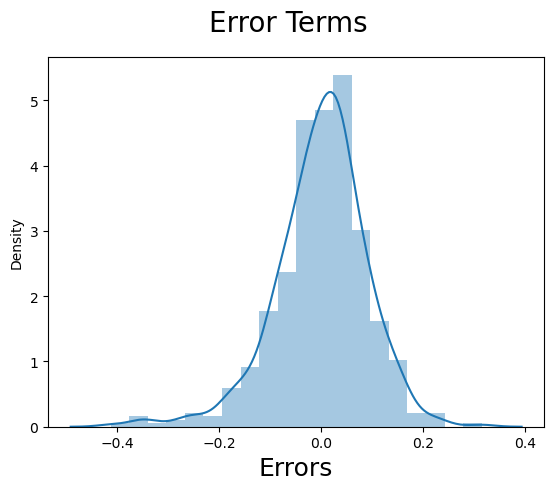

In [201]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_rfe - y_train_bikeCount), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [202]:
X_rf=X_test_copy[['yr','workingday','windspeed','sep','sat','lightSnow','mistCloudy','summer','winter','temp']]
X_rf

,yr,workingday,windspeed,sep,sat,lightSnow,mistCloudy,summer,winter,temp
184,0,0,0.149393,0,0,0,1,0,0,0.837241
535,1,1,0.231142,0,0,0,0,1,0,0.911423
299,0,1,0.443398,0,0,0,1,0,1,0.496221
221,0,1,0.449707,0,0,0,0,0,0,0.890387
152,0,1,0.682387,0,0,0,0,1,0,0.821739
...,...,...,...,...,...,...,...,...,...,...
400,1,0,0.388364,0,0,0,1,0,0,0.224955
702,1,1,0.383644,0,0,0,0,0,1,0.503971
127,0,0,0.132095,0,0,0,0,1,0,0.573725
640,1,1,0.111637,0,0,0,1,0,1,0.745342


In [203]:
X_test_rf=sm.add_constant(X_rf)

In [204]:
X_test_rf

,const,yr,workingday,windspeed,sep,sat,lightSnow,mistCloudy,summer,winter,temp
184,1.0,0,0,0.149393,0,0,0,1,0,0,0.837241
535,1.0,1,1,0.231142,0,0,0,0,1,0,0.911423
299,1.0,0,1,0.443398,0,0,0,1,0,1,0.496221
221,1.0,0,1,0.449707,0,0,0,0,0,0,0.890387
152,1.0,0,1,0.682387,0,0,0,0,1,0,0.821739
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.388364,0,0,0,1,0,0,0.224955
702,1.0,1,1,0.383644,0,0,0,0,0,1,0.503971
127,1.0,0,0,0.132095,0,0,0,0,1,0,0.573725
640,1.0,1,1,0.111637,0,0,0,1,0,1,0.745342


In [205]:
y_pred_BikeCount = lr_final7.predict(X_test_rf)

In [206]:
y_test.shape

(219,)

Text(0, 0.5, 'y_pred')

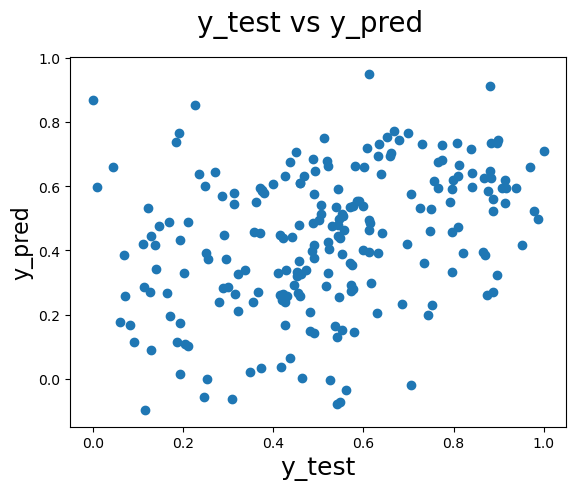

In [207]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_BikeCount)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)

In [208]:
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_test, y_pred_BikeCount)
R2_Squa = round(r2,4)
print(R2_Squa)

-0.328


#### R2 squared value -0.328 suggests that this model obtained using RFE is not a great fit could be because of below reasons
#### Overfitting: The model has captured noise and specific patterns in the training data that do not generalize to the test data
#### Inadequate Training Data: The training data might not be representative of the overall data distribution, leading to poor performance on the test set.

#### Inference: So the model obtained through RFE is clearly not right fit, So we can reject this model.

##### Let's understand the reson behind this

In [209]:
lr_final7.params

const         0.075325
yr            0.233056
workingday    0.056323
temp          0.549936
windspeed    -0.155238
sep           0.097236
sat           0.067688
lightSnow    -0.288021
mistCloudy   -0.081347
summer        0.087429
winter        0.131826
dtype: float64

## Final equation with model using RFE:
### cnt_rfe = 0.075 + 0.233×yr + 0.056×workingday + 0.54×temp - 0.155×windspeed + 0.097×sep + 0.068×sat - 0.288×lightSnow - 0.081×mistCloudy + 0.087×summer + 0.132×winter

## Final equation with manual model:
### cnt = 0.113 + 0.481×temp + 0.113×winter + 0.094×summer - 0.084×mistCloudy - 0.296×lightSnow + 0.067×sat + 0.115×sep + 0.042×oct - 0.047×jan + 0.053×aug - 0.163×windspeed + 0.056×workingday + 0.234×yr

### Observations:
#### If we analyze carefully we are missing 'jan', 'aug' and 'oct in the model using RFE
#### Let's cross-check the top 15 variables selected via RFE ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july','sep', 'sat', 'sun', 'clear', 'lightSnow', 'mistCloudy', 'summer','winter']
#### We observe that 'jan' ,'aug' and 'oct' are  not even the part of top 15 variables, whereas highly collinear variable 'clear' and 'holiday' are making to the top 15 variables
#### This can be the reason of overfitting or noise.

#                                               Summary
### For our final prediction we will rely on the manual model as we are getting the desired result

### Equation: cnt = 0.113 + 0.481×temp + 0.113×winter + 0.094×summer - 0.084×mistCloudy - 0.296×lightSnow + 0.067×sat + 0.115×sep + 0.042×oct - 0.047×jan + 0.053×aug - 0.163×windspeed + 0.056×workingday + 0.234×yr

### Important values:
#### 1. Train dataset R^2 : 0.843
#### 2. Test dataset R^2 : 0.791
#### 3. Train dataset Adjusted R^2 : 0.839
#### 4. Test dataset Adjusted R^2 : 0.777

### Significant variables:
#### 1.year
#### 2.workingday
#### 3.temperature
#### 4.windspeed
#### 5.Season(Winter, Summer)
#### 6.months(August, October, September,January)
#### 7.weathersit( Light Snow, Mist  Cloudy)
#### 8.Days(Saturday)

### Inferences¶
#### Company should focus on Winter and Summer Season to expand the business as the demand is high
#### Demand for bikes is less in Mist Cloudy and Light snow weather situations. So not a right time for business
#### On Saturdays the demand for shared bike is high
#### Months Aug, Sep , Oct are good for shared bike business whereas in January the business is showing downward trend
#### If WindSpeed is high demand for bike is less
#### On Workingdays demand for bike is high
#### Year 2019 has seen a higher demand for shared bikes compared to 2018.